In [5]:
import pandas as pd

df = pd.read_csv('./dataset_phishing.csv')
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [2]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [3]:
df['is_phishing'] = df['status'].apply(lambda x: 1 if x=='legitimate' else 0)
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,is_phishing
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,1,0,45,-1,0,1,1,4,legitimate,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,0,77,5767,0,0,1,2,phishing,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,0,0,14,4004,5828815,0,1,0,phishing,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,0,62,-1,107721,0,0,3,legitimate,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,1,0,224,8175,8725,0,0,6,legitimate,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,448,5396,3980,0,0,6,legitimate,1
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,0,0,211,6728,0,0,1,0,phishing,0
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,2809,8515,8,0,1,10,legitimate,1
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,0,0,85,2836,2455493,0,0,4,legitimate,1


In [4]:
selectedFeatures = ['url',
                    'length_url',
                    'length_hostname',
                    'ip',
                    'nb_dots',
                    'nb_qm',
                    'nb_eq',
                    'nb_slash',
                    'nb_www',
                    'ratio_digits_url',
                    'ratio_digits_host',
                    'tld_in_subdomain',
                    'prefix_suffix',
                    'shortest_word_host',
                    'longest_words_raw',
                    'longest_word_path',
                    'phish_hints',
                    'nb_hyperlinks',
                    'ratio_intHyperlinks',
                    'empty_title',
                    'domain_in_title',
                    'domain_age',
                    'google_index',
                    'page_rank',
                    'is_phishing']

In [5]:
# df = df.loc[:, selectedFeatures]
# df['phish_hints']
df = df[['is_phishing','page_rank']]
df

,is_phishing,page_rank
0,1,4
1,0,2
2,0,0
3,1,3
4,1,6
...,...,...
11425,1,6
11426,0,0
11427,1,10
11428,1,4


In [6]:
df = pd.read_csv('./test.csv')
df.head(5)

,url,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,...,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank,is_phishing
0,http://king-sport.it/magmi/go/index.php,39,13,0,2,0,0,5,0,0.000000,...,5,0,12,0.750000,0,1,1771,1,0,0
1,https://wizardinfurius.000webhostapp.com/login...,51,32,0,3,0,0,3,0,0.058824,...,5,1,203,0.133005,0,1,1546,1,2,0
2,http://www.rogerebert.com/reviews/bridge-of-sp...,54,18,0,2,0,0,4,1,0.074074,...,7,1,157,0.923567,0,1,-1,0,6,1
3,https://www.top10mealdeliveryservices.com/,42,33,0,2,0,0,3,1,0.047619,...,0,0,29,0.620690,0,1,1594,0,3,1
4,https://support-appleld.com.secureupdate.duila...,127,50,1,4,1,3,4,0,0.173228,...,17,0,51,1.000000,0,1,3993,1,0,0


In [7]:
x = df.drop('url', axis=1)
x

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank,is_phishing
0,39,13,0,2,0,0,5,0,0.000000,0.000000,...,5,0,12,0.750000,0,1,1771,1,0,0
1,51,32,0,3,0,0,3,0,0.058824,0.093750,...,5,1,203,0.133005,0,1,1546,1,2,0
2,54,18,0,2,0,0,4,1,0.074074,0.000000,...,7,1,157,0.923567,0,1,-1,0,6,1
3,42,33,0,2,0,0,3,1,0.047619,0.060606,...,0,0,29,0.620690,0,1,1594,0,3,1
4,127,50,1,4,1,3,4,0,0.173228,0.000000,...,17,0,51,1.000000,0,1,3993,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,51,32,0,2,0,0,4,0,0.000000,0.000000,...,10,0,7,0.000000,0,1,2306,1,0,0
3425,42,34,0,2,0,0,3,0,0.000000,0.000000,...,0,0,63,0.206349,0,1,7298,0,5,1
3426,17,9,0,1,0,0,3,0,0.000000,0.000000,...,0,0,10,0.900000,0,0,-1,0,3,1
3427,25,16,0,2,0,0,3,1,0.000000,0.000000,...,0,0,67,0.880597,0,0,8732,0,4,1


# Plotting training and validation loss over epochs and validation accuracy over epochs

In [6]:
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd

In [8]:
def load_object(file_path):
    try:
        with open(file_path, "rb") as file_obj:
            return pickle.load(file_obj)

    except Exception as e:
        # raise CustomException(e, sys)
        return None

In [9]:


model_history = load_object("../archive/ANN_model_history.pkl")
print(model_history)

{'accuracy': [0.5041924715042114, 0.5366387367248535, 0.6277797818183899, 0.6919431090354919, 0.7590229511260986, 0.7896463871002197, 0.82901930809021, 0.8479766845703125, 0.8640174865722656, 0.8756835460662842, 0.8789646625518799, 0.8884432911872864, 0.8964637517929077, 0.896828293800354, 0.9077652096748352, 0.9063069820404053, 0.9128690958023071, 0.9157856106758118, 0.9121400117874146, 0.9179730415344238, 0.9176084399223328, 0.9165147542953491, 0.9241706132888794, 0.921618640422821, 0.9219832420349121, 0.9223477840423584, 0.925264298915863, 0.9274516701698303, 0.9241706132888794, 0.9245351552963257, 0.9296391010284424, 0.9256289005279541, 0.9256289005279541, 0.9292744994163513, 0.9285454154014587, 0.9292744994163513, 0.930368185043335, 0.9383886456489563, 0.934378445148468, 0.9372949600219727, 0.9329201579093933, 0.934378445148468, 0.930368185043335, 0.9347429871559143, 0.9336493015289307, 0.9318264722824097, 0.9347429871559143, 0.9362012147903442, 0.935836672782898, 0.93437844514846

# Plotting training and validation loss over epochs

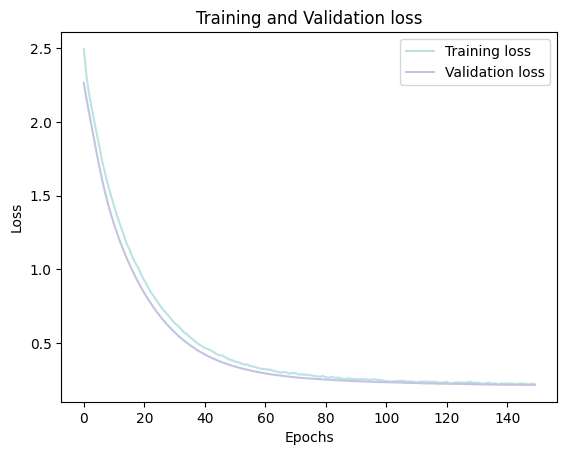

In [10]:
history_df = pd.DataFrame(model_history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

# Plotting training and validation accuracy over epochs

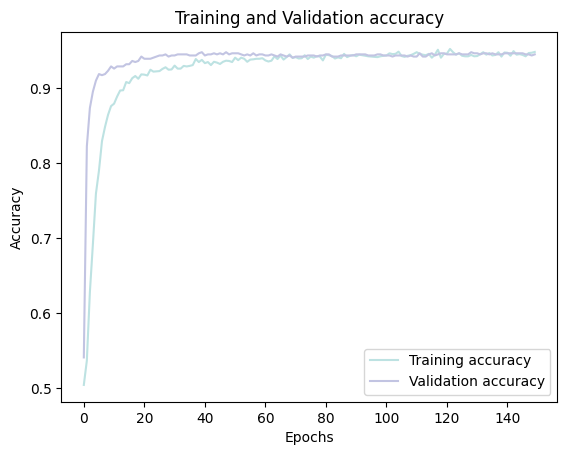

In [11]:
history_df = pd.DataFrame(model_history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()